In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("../data/HR_log/KISMED_SzW72_SzH72_ClipLen180_DataTypeRaw_DataAugNone_LabelTypeRaw_ROI_segmeTrue_Angle_thres30_Interp_AngleTrue_ROI_mode-optimal_roi_Use_convex_hullTrue_Constr_roiTrue_Outs_roiFalse_unsupervised/optimal_roi_POS.csv")


In [20]:
df

,method_name,video_file,starting_frame,ending_frame,predict_hr_fft_all,gt_hr_fft_all,SNR_all
0,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,93.164062,94.921875,3.116686
1,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,94.921875,98.437500,5.317623
2,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,77.343750,103.710938,-8.866926
3,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,101.953125,101.953125,-1.203237
4,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,96.679688,96.679688,-13.343448
...,...,...,...,...,...,...,...
339,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,107.226562,103.710938,-5.946600
340,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,93.164062,93.164062,9.049239
341,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,94.921875,94.921875,9.446967
342,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,98.437500,98.437500,0.180414


In [25]:
scenarios = []
subjects = []
for i in range(df.shape[0]):
    scenarios.append(df["video_file"][i].split('/')[-1].replace('-','_').split('_')[1])
    subjects.append(df["video_file"][i].split('/')[-1].replace('-','_').split('_')[0])
df_manip = df.copy()
df_manip["scenario"]=scenarios
df_manip["subject"] = subjects


In [26]:
df_manip

,method_name,video_file,starting_frame,ending_frame,predict_hr_fft_all,gt_hr_fft_all,SNR_all,scenario,subject
0,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,93.164062,94.921875,3.116686,v01,p001
1,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,94.921875,98.437500,5.317623,v01,p001
2,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,77.343750,103.710938,-8.866926,v02,p001
3,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,101.953125,101.953125,-1.203237,v02,p001
4,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,96.679688,96.679688,-13.343448,v03,p001
...,...,...,...,...,...,...,...,...,...
339,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,107.226562,103.710938,-5.946600,v10,p010
340,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,93.164062,93.164062,9.049239,v11,p010
341,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,94.921875,94.921875,9.446967,v11,p010
342,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,98.437500,98.437500,0.180414,v12,p010


In [27]:
scenario_names = df_manip.scenario.unique()

In [30]:
df_manip[df_manip['scenario']==scenario_names[0]]

,method_name,video_file,starting_frame,ending_frame,predict_hr_fft_all,gt_hr_fft_all,SNR_all,scenario,subject
0,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,93.164062,94.921875,3.116686,v01,p001
1,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,94.921875,98.437500,5.317623,v01,p001
35,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,54.492188,54.492188,14.361044,v01,p002
36,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,54.492188,52.734375,15.679535,v01,p002
66,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,75.585938,77.343750,-1.634381,v01,p003
67,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,73.828125,73.828125,5.727604,v01,p003
101,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,68.554688,68.554688,16.108691,v01,p004
102,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,68.554688,65.039062,14.151675,v01,p004
136,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,0,900,89.648438,86.132812,-0.879608,v01,p005
137,POS,/home/rohr/data_cache/rppg_toolbox/preprocesse...,900,1800,91.406250,91.406250,1.536825,v01,p005


In [35]:
MAEs = []
RMSEs = []
SNR_m = []
errors = []
for sc in scenario_names:
    preds = df_manip[df_manip['scenario']==sc]['predict_hr_fft_all']
    gt = df_manip[df_manip['scenario']==sc]['gt_hr_fft_all']
    snrs = df_manip[df_manip['scenario']==sc]['SNR_all']
    errors.append(preds-gt)
    MAEs.append(np.mean(np.abs(preds-gt)))
    RMSEs.append(np.sqrt(np.mean((preds-gt)**2)))
    SNR_m.append(snrs.mean())
    
df_scenarios = pd.DataFrame({"scenario":scenario_names,"MAE":MAEs,"RMSE":RMSEs,"SNR_m":SNR_m})
df_scenarios
    

,scenario,MAE,RMSE,SNR_m
0,v01,0.966797,1.620623,7.378458
1,v02,6.416016,15.961286,1.261208
2,v03,12.568359,18.440283,-12.032986
3,v04,2.821752,4.624434,-3.998443
4,v05,12.304688,17.410799,-12.762054
5,v06,4.003906,7.240538,-0.235935
6,v07,25.683594,34.671957,-13.118618
7,v08,0.878906,1.470691,3.232510
8,v09,5.625000,10.576131,-4.615808
9,v10,13.710938,21.435224,-6.335098


/home/rohr/anaconda3/envs/rppg-toolbox/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7efc4f1558b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc4f0e2280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc4f155880>,
 'medians': [<matplotlib.lines.Line2D at 0x7efc4f0e28e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efc4f155820>,
 'means': []}

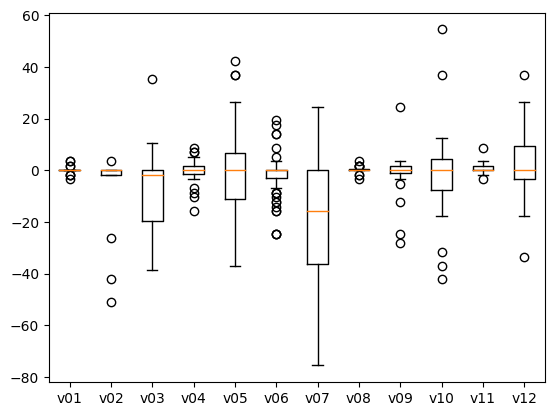

In [38]:
plt.figure()
plt.boxplot(errors,labels=scenario_names)

In [53]:
df_small = df_manip[(df_manip['predict_hr_fft_all']-df_manip['gt_hr_fft_all']).abs()<2]

In [48]:
df_small["scenario"].value_counts()

v06    65
v04    28
v01    20
v08    20
v11    19
v02    17
v09    15
v05    14
v03    10
v10     9
v12     9
v07     5
Name: scenario, dtype: int64

In [45]:
df_manip["scenario"].value_counts()

v06    90
v04    38
v05    38
v03    20
v10    20
v12    20
v09    20
v08    20
v01    20
v11    20
v02    20
v07    18
Name: scenario, dtype: int64

In [54]:
(df_small["scenario"].value_counts()/df_manip["scenario"].value_counts())

v01    0.850000
v02    0.800000
v03    0.350000
v04    0.657895
v05    0.342105
v06    0.633333
v07    0.222222
v08    0.900000
v09    0.550000
v10    0.400000
v11    0.850000
v12    0.450000
Name: scenario, dtype: float64